In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [30]:
x = np.arange(1,100,3)
y = 2*x+3

In [31]:
len(x)

33

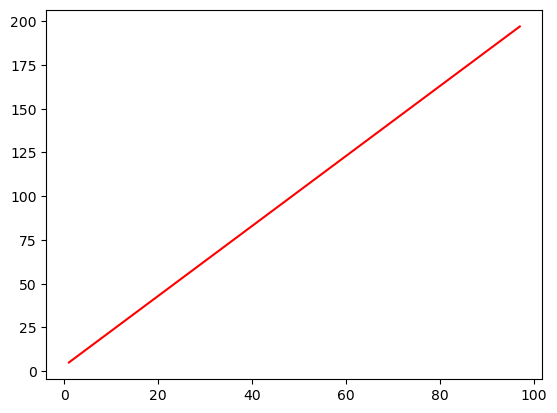

In [32]:
plt.plot(x,y,'r-')

In [33]:
# now add Gaussian noise
sigma = 10
eps = norm.rvs(scale=sigma,size=len(y),random_state = 999)
y_noisy = y+eps

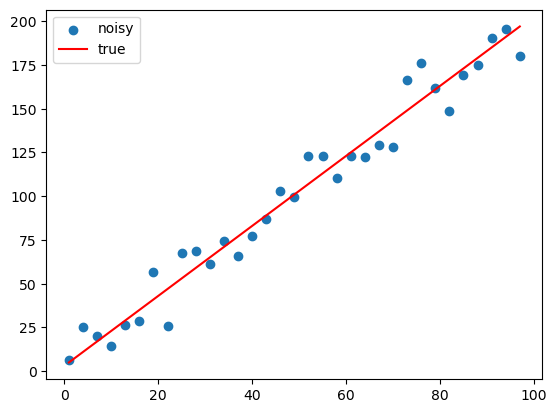

In [34]:
plt.scatter(x,y_noisy,label='noisy')
plt.plot(x,y,'r-',label='true')
plt.legend(loc=2)

In [35]:
# use our defined estimators

def b1(x,y_noisy):
    numerator = np.sum(x*y_noisy)-len(x)*np.mean(x)*np.mean(y_noisy)
    denominator = np.sum(x*x)-len(x)*np.mean(x)*np.mean(x)
    return numerator/denominator

def b0(x,y_noisy):
    numerator = np.sum(x*y_noisy)-len(x)*np.mean(x)*np.mean(y_noisy)
    denominator = np.sum(x*x)-len(x)*np.mean(x)*np.mean(x)
    return np.mean(y_noisy)-numerator/denominator*np.mean(x)

In [36]:
b1_hat = b1(x,y_noisy)
b0_hat = b0(x,y_noisy)
print('slope:',b1_hat,'intercept:',b0_hat)

slope: 1.9533618360852194 intercept: 5.206514404700826


In [37]:
# LS regression with numpy.linalg.lstsq

A = np.vstack([x, np.ones(len(x))]).T
coeff, residual, rank, s = np.linalg.lstsq(A, y_noisy)
b1_np, b0_np = coeff
print('slope:',b1_np,'intercept:',b0_np, residual[0])

slope: 1.9533618360852172 intercept: 5.206514404700885 3770.0386704215907


/var/folders/nm/fjbhgywj517888nl37r_j1jm0000gn/T/ipykernel_91507/3167916023.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff, residual, rank, s = np.linalg.lstsq(A, y_noisy)


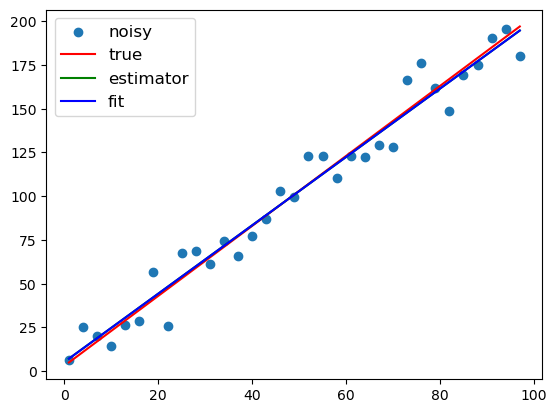

In [38]:
plt.scatter(x,y_noisy,label='noisy')
plt.plot(x,y,'r-',label='true')
plt.plot(x,b1_hat*x+b0_hat,'g-',label='estimator')
plt.plot(x,b1_np*x+b0_np,'b-',label='fit')
plt.legend(loc=2,prop={'size': 12})

In [39]:
# distribution of b1

from scipy.stats import tvar

s2 = tvar(x) # sample variance
ki = (x-np.mean(x))/((len(x)-1)*s2)
b1_hat_2 = np.sum(ki*y_noisy)
b0_hat_2 = np.mean(y_noisy)-b1_hat_2*np.mean(x)
print(b1_hat_2,b0_hat_2)

1.953361836085218 5.206514404700883


In [40]:
# Homework: follow the lecture to find 90% confidence interval for beta_0 and beta_1
# is the true value inside your confidence interval?
from scipy.stats import t

In [41]:
#random_state fixed to 999 for reproducibility
n = len(x)
MSE = (1 / (n-2)) * np.sum((y_noisy - (b1_hat*x+b0_hat))**2)
s_b1 = np.sqrt(MSE /np.sum((x - np.mean(x))**2))
s_b0 = np.sqrt(MSE * (1/n + (np.mean(x)**2/(np.sum((x - np.mean(x))**2)))))

alpha = 0.1
tval = t.ppf(1-alpha/2, df = n-2)

b1_min = b1_hat - tval * s_b1
b1_max = b1_hat + tval * s_b1

b0_min = b0_hat - tval * s_b0
b0_max = b0_hat + tval * s_b0

print(f'90% CI for b1 is {[b1_min,b1_max]} and the true value for b1 is {2} which lies within the 90% CI')
print(f'90% CI for b0 is {[b0_min,b0_max]} and the true value for b1 is {3} which lies within the 90% CI')

90% CI for b1 is [1.8394175338962817, 2.067306138274157] and the true value for b1 is 2 which lies within the 90% CI
90% CI for b0 is [-1.2562473093235393, 11.669276118725191] and the true value for b1 is 3 which lies within the 90% CI
